# Showmax App NLP Project

The core elements of the project entail:
1. Data Scraping Plan
2. Exploratory Data Analysis:
  * Dataset profile
  * Data Pre-processing: Data cleansing actions
  * Answering Key Questions linked to the dataset
3. Sentiment Analysis: Conduct sentiment analysis using algorithims like TextBob, VADER and Huggie's NLP pre-trained models to to determine the sentiment (positive, negative, neutral) of each review
4. Keyword Analysis: Identify common themes and issues afecting Showmax app users
5. User segment analysis: Segment users based on review patterns
6. Summarized Insights
7. Recomendations


## Data Scraping Plan

The plan entails acquiring Showmax app mobile reviews from Google Playstore, and analyze it. The data collection method will involve using Google Play Scrapper library to collect mobile reviews data.

Steps of scrapping:

* Load libraries
* Display a snapshot of Showmax app details
* Scrap reviews using a script
* Save reviews as CSV file for analysis


In [ ]:
#installing library in environment
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 97.6 kB/s eta 0:00:00


In [ ]:
from google_play_scraper import Sort, app, reviews_all # scrapping reviews from Google Playstore
import pandas as pd  #storing collected data as csv and dataframe

In [ ]:
# Showmax app detail

# ID for Showmax app
app_id = "com.showmax.showmax.google"

# Fetch app details
showmax_details = app(app_id)

# Convert details to a DataFrame
details_df = pd.DataFrame([showmax_details])

# Display the details
print(details_df.T)  # Transpose to view results vertically




                                                                          0
title                                                               Showmax
description               Trending local shows, award-winning internatio...
descriptionHTML           Trending local shows, award-winning internatio...
summary                   Watch hit series and movies, plus live-stream ...
installs                                                         1,000,000+
minInstalls                                                         1000000
realInstalls                                                        3924609
score                                                              4.145161
ratings                                                               80346
reviews                                                                  12
histogram                                    [11663, 0, 2591, 16846, 49244]
price                                                                     0
free        

### Key facts from Showmax App Details

The key facts derived from Showmax App details include:

* Showmax is a streaming platform that hosts trending local shows, award-winning international series, blockbuster movies, kids’ shows, ground-breaking documentaries, and live Premier League football

* Mobile app donwloads are 1M+
* Overall app rating is 4.1
* Total number of reviews is 80,262
* App genre is Entertainment
* Content rating is Teenager
* Date of the last update: 17th October 2024
* Developer/App owner is  Showmax Africa Holdings Limited

In [ ]:
# Scrape reviews

reviews = reviews_all(
    app_id, # Use Showmax app app_id
    sleep_milliseconds=0, # defaults to 0
    lang='en', # English 'en'
    country='za', # country code of south africa
    sort=Sort.MOST_RELEVANT, #  Sortmost relevant reviews
)


In [ ]:
# Convert all reviews to a DataFrame
showmax_reviews = pd.DataFrame(reviews)

# Save to a CSV file
showmax_reviews.to_csv("all_showmax_reviews.csv", index=False)

In [ ]:
showmax_reviews.shape

(12009, 11)

### Key Facts from Scraping Showmax App Reviews

* Only relevant mobile app reviews were retrieved from Google Playstore
* About 12K+ reviews were scraped from Showmax App reviews


## Exploratory Data Analysis

Exploratory data analysis involves investigating and summarizing key insights and main characteristics linked to the data. The process provides answers to significant questions that arise when processing(cleaning) the data.

**Goals of Exploratory Data Analysis**

Key goals looking to be achieved by implementing EDA include:

1. Discovering the underlying structure of the dataset
2. Extract patterns, anomalies and trends in the dataset
3. Test hypotheses and validate assumptions about the data
4. Forecast what problems could be solved by insights extracted from the data

**Key EDA Steps**

* Data profile review: Source of data, inspecting the structure of the dataset with the aim of understanding the shape of our dataset, features(variables), data types, missing values and duplicated values
* Data Pre-processing: Depending on results of understanding the dataset, we can clean and wrangle our dataset
* Answering Exploratory Questions linked to the dataset

In [ ]:
# Loading  libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set style for my visualizations
plt.style.use('ggplot')

In [ ]:
!pip install plotly

In [ ]:
# load interactive visualization package - plotly
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# check number of reviews
print(f"The # of reviews submitted to app is {showmax_reviews.shape[0]}")

The # of reviews submitted to app is 12009


In [ ]:
# inspect first data points of the dataset
showmax_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c9077536-3e97-43e4-b7d0-4f8d8145ce46,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,You can't remove shows from continue watching....,2,67,5.9.33,2024-10-04 16:35:26,None,NaT,5.9.33
1,7c075d0a-601b-49f8-ae76-b1044278ccb3,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It does have nice Afrikaans shows but was watc...,2,4,5.9.33,2024-10-06 13:42:23,None,NaT,5.9.33
2,475e732b-f8ac-4ced-9e91-269297b67446,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,There's some things about the interface that c...,3,5,5.10.14,2024-10-22 08:04:12,None,NaT,5.10.14
3,85c852c7-ebeb-4661-a41f-1f77241364f6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Showmax has fantastic shows, but this new app ...",1,190,5.9.20,2024-09-09 13:33:14,None,NaT,5.9.20
4,771ba22e-d677-43f7-87cc-7c57ff9a1862,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Whilst Showmax did promise to eventually trans...,2,167,1.19.72,2024-10-21 10:35:35,None,NaT,1.19.72


In [ ]:
# Dataset information

showmax_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              12009 non-null  object        
 1   userName              12009 non-null  object        
 2   userImage             12009 non-null  object        
 3   content               12009 non-null  object        
 4   score                 12009 non-null  int64         
 5   thumbsUpCount         12009 non-null  int64         
 6   reviewCreatedVersion  10980 non-null  object        
 7   at                    12009 non-null  datetime64[ns]
 8   replyContent          258 non-null    object        
 9   repliedAt             258 non-null    datetime64[ns]
 10  appVersion            10980 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.0+ MB


**Data Features Meaning**

Columns present in the dataset include:

1. **reviewId**: Unique identifier for each review
2. **userName**: Name of the user who posted the review
3. **userImage**: URL of the user’s profile image
4. **content**: Text content of the review
5. **score**: Star rating given by the user (1-5)
6. **thumbsUpCount**: Number of thumbs-up (likes) the review received
7. **reviewCreatedVersion**: Version of the app when the review was created
8. **at**: Date and time when the review was posted
9. **replyContent**: Content of the developer’s reply to the review
10. **repliedAt**: Date and time when the developer replied to the review
11. **appVersion**: Version of the app when the review was posted






In [ ]:
# inspect a sample of the dataset

showmax_reviews[['content','at', 'score']].sample(20)

,content,at,score
7387,l been experiencing plem when download showmax...,2024-03-16 19:47:02,1
4760,Am in Botswana app took payments but now claim...,2024-02-24 20:04:01,1
7740,I need my refund cause for some reason I canno...,2024-02-21 17:12:35,1
11816,You Are The Best !. David in Kenya.,2024-08-13 14:28:51,5
6136,Showmax has the best content and it really is ...,2024-02-20 16:09:39,5
3800,Poor application...I cannot watch on the app e...,2024-02-18 08:10:40,1
7782,"Fix this app, it's horrible yhuuu",2024-02-02 03:56:42,1
1914,DOES.NOT.WORK. I tried logging in to the old a...,2024-01-26 18:49:40,1
3003,This version is not nice... removed Villa Rosa...,2024-01-25 18:09:01,1
7965,Was busy watching Villa Rosa and cant any more...,2024-01-26 10:41:57,1


In [ ]:
# Inspect the structure of dataset
print(f"There are {showmax_reviews.shape[0]} rows and {showmax_reviews.shape[1]} columns in the dataset")

There are 12009 rows and 11 columns in the dataset


In [ ]:
# check for missing values

showmax_reviews.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,1029
at,0
replyContent,11751
repliedAt,11751


In [ ]:
# Proportion of missing values in relation to total number of datapoints

missing_values_proportion = showmax_reviews.isnull().sum() / showmax_reviews.shape[0] * 100

print("Proportion of missing values in each column:")
print(missing_values_proportion)


Proportion of missing values in each column:
reviewId                 0.000000
userName                 0.000000
userImage                0.000000
content                  0.000000
score                    0.000000
thumbsUpCount            0.000000
reviewCreatedVersion     8.568574
at                       0.000000
replyContent            97.851611
repliedAt               97.851611
appVersion               8.568574
dtype: float64


Two columns that have the highest number of missing values are:
* `replyContent`: 97.85%
* `repliedAt`: 97.85%

**Next step**: Drop the two columns - they will provide no value in analysis

Other columns with low number of missing values are:

* `reviewCreatedVersion`: 8.5%
* `appVersion`: 8.5%

In [ ]:
# Check for duplicates

duplicate_rows = showmax_reviews[showmax_reviews.duplicated()]

print(f"There are {duplicate_rows.shape[0]} duplicate rows in the Showmax reviews dataset.")


There are 0 duplicate rows in the Showmax reviews dataset.


In [ ]:
# Summary stats for numerical features
showmax_reviews[['score', 'thumbsUpCount']].describe().T

,count,mean,std,min,25%,50%,75%,max
score,12009.0,2.074361,1.623102,1.0,1.0,1.0,3.0,5.0
thumbsUpCount,12009.0,2.564243,29.889518,0.0,0.0,0.0,0.0,1604.0


### Data Pre-processing

This phase entails:
* Removing non-significant columns
* Renaming columns: `at`, `replyContent`, `repliedAt`, and `reviewCreatedVersion`
* Dealing with missing values


In [ ]:
# Make a copy of the original dataset

showmax_df = showmax_reviews.copy()

In [ ]:
# Remove the following columnS from the dataset: userImage, thumbsUpCount, reviewid, userName
showmax_df.drop(['userImage', 'reviewId','thumbsUpCount', 'userName'], axis=1, inplace=True)


In [ ]:
# Check for remaining useful columns
showmax_df.columns

Index(['content', 'score', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')

In [ ]:
# Renaming columns:`at`, `replyContent`, `repliedAt`, and `reviewCreatedVersion` to : 'review_date`, `dev_reply`, 'devreply_date`, and `reviewapp_version` respectively

showmax_df.rename(columns={'at': 'review_date',
                         'replyContent': 'dev_reply',
                         'repliedAt': 'devreply_date',
                         'reviewCreatedVersion': 'reviewapp_version'}, inplace=True)

#ascertain column names
showmax_df.columns


Index(['content', 'score', 'reviewapp_version', 'review_date', 'dev_reply',
       'devreply_date', 'appVersion'],
      dtype='object')

In [ ]:
showmax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   content            12009 non-null  object        
 1   score              12009 non-null  int64         
 2   reviewapp_version  10980 non-null  object        
 3   review_date        12009 non-null  datetime64[ns]
 4   dev_reply          258 non-null    object        
 5   devreply_date      258 non-null    datetime64[ns]
 6   appVersion         10980 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 656.9+ KB


**Dealing with Missing Values**

Based on the output of missing values, here's how the columns containing missing values will be handled:

* `dev_reply` and `devreply_date`: Drop the two columns from the dataset

* `appVersion`: Missing values are filled with the most frequent appVersion

* `reviewapp_version`: Missing values are filled with the most frequent reviewap_version

In [ ]:
# Drop this two columns: dev_reply and devreply_date

showmax_df.drop(['dev_reply', 'devreply_date'], axis=1, inplace=True)

# Display updated DataFrame info
showmax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   content            12009 non-null  object        
 1   score              12009 non-null  int64         
 2   reviewapp_version  10980 non-null  object        
 3   review_date        12009 non-null  datetime64[ns]
 4   appVersion         10980 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 469.2+ KB


In [ ]:
# fill missing values in 'appVersion' and 'reviewapp_version' with most frequent
# value

showmax_df['appVersion'].fillna(showmax_df['appVersion'].mode()[0], inplace=True)
showmax_df['reviewapp_version'].fillna(showmax_df['reviewapp_version'].mode()[0], inplace=True)

<ipython-input-26-4d59928df2fb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  showmax_df['appVersion'].fillna(showmax_df['appVersion'].mode()[0], inplace=True)
<ipython-input-26-4d59928df2fb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
# Ascertain if there is missing values
showmax_df.isnull().sum()

,0
content,0
score,0
reviewapp_version,0
review_date,0
appVersion,0


In [ ]:
# Check cleaned dataset version
showmax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   content            12009 non-null  object        
 1   score              12009 non-null  int64         
 2   reviewapp_version  12009 non-null  object        
 3   review_date        12009 non-null  datetime64[ns]
 4   appVersion         12009 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 469.2+ KB


In [ ]:
# Save the cleaned dataset into a csv file

showmax_df.to_csv('cleaned_showmax_df.csv', index=False)


### **Exploratory Questions**

Preliminary questions that can be used to investigate the general outlook of the dataset include:


1.   What's the overall distribution of review scores/ratings?
2.   Number of reviews per App version?
3.   Segment review score per App version




In [ ]:
# Quiz 1: distribution of review scores

showmax_df['score'].value_counts().sort_index(ascending=True)

,count
score,
1,7771
2,817
3,568
4,463
5,2390


In [ ]:
# visualization of distribution of review scores
fig = px.histogram(showmax_df, x='score', title='1-Score Reviews Dwarf others by Leading with 7,771 1-Score Reviews')
fig.show()


Based on output of the visualization above, majority of review scores were 1-score rating, containing **7,770 reviews with 1-star score**.

In [ ]:
# Quiz 2: Number of reviews per App version
reviews_app = showmax_df['appVersion'].value_counts().reset_index()
reviews_app.columns = ['appVersion', 'review_count']
reviews_app

,appVersion,review_count
0,4.12.21,3633
1,4.12.20,2446
2,1.10.74,1474
3,5.3.12,1227
4,5.8.14,391
5,5.5.32,368
6,5.6.25,343
7,5.7.21,257
8,5.9.21,235
9,1.10.80,225


In [ ]:
# Visualize # of reviews per app version

#Create a bar plot using Plotly
fig = px.bar(reviews_app, x='appVersion', y='review_count', title='Number of Reviews per App Version',
             labels={'app_version': 'App Version', 'review_count': 'Number of Reviews'})
fig.show()


**App version 4.12.21** had the highest number of reviews submited by Showmax App users, about ***3,633*** reviews.

In contrast, **App verison 5.9.32** had the lowest number of reviews submitted by Showmax users, about **7** reviews.

The next question would be, based on number of reviews per app version, which app version received the best/worst review score?

In [ ]:
# Quiz 3: Segmenting review score by app version

review_score_app = showmax_df.groupby('appVersion')['score'].mean().sort_values().reset_index()
review_score_app


,appVersion,score
0,1.10.74,1.208277
1,1.10.80,1.253333
2,1.10.86,1.582609
3,4.12.20,1.595258
4,1.17.48-Default-Prod,1.758621
5,1.10.92,1.785124
6,4.12.21,1.866777
7,1.17.54-Default-Prod,1.904762
8,1.18.6,1.909091
9,1.17.24-Default-Prod,2.166667


In [ ]:
# plot reviews score by app version

fig = px.line(review_score_app, x='appVersion', y='score',
              title='Showmax App Version 5.9.33 was the Best Performing App Version, with average Review Score of 3.5',
               labels={'appVersion': 'App Version', 'score': 'Average Rating'})
fig.show()


Based on the ouput:

* App version **5.9.33** received the highest **average review score of 3.5**. The number of reviews submitted by users for App version 5.9.33 was 182 (see previous visualization). App  version 1.10.74 received the lowest **average review score of 1.2**.

The low average score App version 1.10.74 contrasts the number of reviews it received, 1474 reviews( check previus visualization). This means, a large portion of reviews shared by Showmax users for App version 1.10.74 had lower rating score.


Overall, based on average review scores,  the best pefoming version of Showmax App was ***App version 5.9.33***

## Sentiment Analysis

The goal entails determining the sentiment behind each review - positive, negative or neutral.

**Approach**

Sentiment analysis can be performed using diffrenet algorithims. For this section, we will use the following algorithims to compare performance:

 * TextBlob
 * NLTK's VADER
 * Huggie's NLP pre-trained models


The first two algorithims are rule-based sentimental analysis algorithims.



### TextBlob Model

TextBlob is a simple and easy-to-use library for processing textual data.

It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, and translation.

TextBlob returns **polarity** and **subjectivity** of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.

Subjectivity is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment.


In [ ]:
#install TextBlob
!pip install textblob


In [ ]:
# import TextBlob
from textblob import TextBlob

In [ ]:
# Test 1: pass a baseline string of text into TextBlob object, then classify polarity

text = 'Kenya is a great country. I love it!'

text_sentiment = TextBlob(text).sentiment
text_sentiment

Sentiment(polarity=0.7125, subjectivity=0.675)

The sentiment score is positive, closer to 1. The sentiment expressed by the string in the text variable is positive.

In [ ]:
# Test 2: pass another baseline of string

text2 = 'I hate Chips'
text2_sentiment = TextBlob(text2).sentiment
text2_sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

The sentiment score is negative, closer to -1, thus indicating a negative emotion/opinion.

In [ ]:
# Create dentiment analyzer function that will be used on the dataset
def get_sentiment(data):
    """
    Sentiment analysis function that calculates the sentiment score in a dataset.

    This function takes a text input, processes it using the TextBlob library,
    and returns the sentiment polarity score. The sentiment polarity score is a
    float within the range [-1.0, 1.0], where -1.0 indicates a very negative sentiment,
    0 indicates a neutral sentiment, and 1.0 indicates a very positive sentiment.

    Parameters:
    data (str): The text data for which the sentiment score needs to be computed.

    Returns:
    float: The sentiment polarity score of the input text.

    Example:
    >>> get_sentiment("I love this app! It's amazing.")
    0.875
    >>> get_sentiment("This app is terrible and very slow.")
    -0.75
    """
    analysis = TextBlob(data)
    return analysis.sentiment.polarity



In [ ]:
# Apply the sentiment analysis function on Showmax_df data

showmax_df['sentiment_score'] = showmax_df['content'].apply(get_sentiment)

# Display the first few rows to verify the changes
print(showmax_df[['content', 'score', 'sentiment_score']].head(10))



                                             content  score  sentiment_score
0  You can't remove shows from continue watching....      2         0.218750
1  It does have nice Afrikaans shows but was watc...      2         0.141667
2  There's some things about the interface that c...      3         0.200000
3  Showmax has fantastic shows, but this new app ...      1         0.158996
4  Whilst Showmax did promise to eventually trans...      2         0.167532
5  Technical Support Request: App Playback Error....      1         0.011905
6  The new Showmax app is terrible. When you want...      2        -0.090223
7  Seemless service delivery at an affordable pri...      5         0.160455
8  It's always a challenge to do payment via the ...      2         0.043333
9  Good time devourer. 🙂 Would be much better wit...      3         0.365079


In [ ]:
# Compute the average sentiment

average_sentiment = showmax_df['sentiment_score'].mean()
print(f'Average Sentiment Score: {average_sentiment}')

Average Sentiment Score: 0.06096210615187195


In [ ]:
# Visualizing  Sentiment score distribution

fig = px.histogram(showmax_df, x="sentiment_score", nbins=20, title="TextBlob Model Sentiment Score Distribution")
fig.update_layout(bargap=0.1)
fig.show()


#### TextBlob Model Outcomes

**Interpretation of Average Sentiment Score:**

Average sentiment score is 0.060. The score is slightly closer to the neutral range of the 0 polarity score.

This means users have a **predominatly neutral sentiment** towards the Showmax app.

On average, users have a mixed sentiment, likely including both positive and negative experience with the app.

**Possible causes**:

* Users might be providing both pros and cons, such as mentioning features they enjoy along with issues or improvements they want

* Specific Showmax app features could be receiving both positive and negative review, resulting in a neutral score


**Sentiment Score Distribution Insights**:

* In terms of segmenting number of reviews per sentiment score, **about 4,442 reviews**, the leading number of reviews,  had a sentiment score ranging between 0 and  0.199

* Only **544 reviews** had a strong positive score of 1
* **409 reviews** had a high negative score ranging between -1 and -0.8

### VADER

The rule-based model uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.


The output of VADER is a dictionary with the following keys:

* **neg**: Negative sentiment score
* **neu**: Neutral sentiment score
* **pos**: Positive sentiment score
* **compound**: Overall sentiment score (normalized between -1 and 1)

In [ ]:
# install the library
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
# import library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
# instantiate sentiment object
sia = SentimentIntensityAnalyzer()

In [ ]:
# Test 1: get polarity score of this txt
txt = 'You are great Football player'
txt_score = sia.polarity_scores(txt)
print(txt_score)

{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}


Sentiment score is dominatly positive.

In [ ]:
# Test 2: second string of text
txt2 = 'I do not like Rock music. It is too loud!'
txt2_score = sia.polarity_scores(txt2)
print(txt2_score)

{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.3404}


Overall sentiment is negative, based on negative score and compoud score

In [ ]:
# Create a sentiment analysis function to retrieve sentiment scores based on VADER Model

def get_vader_sentiment(text):
    """
    Sentiment analysis function that computes the sentiment score using VADER.

    This function takes a text input, processes it using the VADER (Valence Aware Dictionary
    and sEntiment Reasoner) sentiment analysis tool, and returns the compound sentiment score.
    The compound score is a float within the range [-1.0, 1.0], where -1.0 indicates a very
    negative sentiment, 0 indicates a neutral sentiment, and 1.0 indicates a very positive sentiment.

    Parameters:
    text (str): The text data for which the sentiment score needs to be computed

    Returns:
    float: The compound sentiment score of the input text

    Example:
    >>> get_vader_sentiment("I love Loop app! It's awesome to use.")
    0.6696
    >>> get_vader_sentiment("This app is terrible and very slow.")
    -0.7269
    """
    sentiment_dict = sia.polarity_scores(text)
    return sentiment_dict['compound']


In [ ]:
# Appy get_vader_sentiment function on Absa_df
showmax_df['vader_sentiment_score'] = showmax_df['content'].apply(get_vader_sentiment)
showmax_df[['content', 'score', 'vader_sentiment_score']].head(10)


,content,score,vader_sentiment_score
0,You can't remove shows from continue watching....,2,-0.3603
1,It does have nice Afrikaans shows but was watc...,2,-0.9161
2,There's some things about the interface that c...,3,0.8008
3,"Showmax has fantastic shows, but this new app ...",1,-0.6614
4,Whilst Showmax did promise to eventually trans...,2,0.6636
5,Technical Support Request: App Playback Error....,1,-0.2023
6,The new Showmax app is terrible. When you want...,2,-0.7699
7,Seemless service delivery at an affordable pri...,5,0.4536
8,It's always a challenge to do payment via the ...,2,-0.6041
9,Good time devourer. 🙂 Would be much better wit...,3,0.7013


In [ ]:
# Compute average vader sentiment score
average_vader_sentiment = showmax_df['vader_sentiment_score'].mean()
print(f'Average VADER Sentiment Score: {average_vader_sentiment}')


Average VADER Sentiment Score: -0.043461670413856276


In [ ]:
# Visualize distribution of vader sentiment score

fig_hist = px.histogram(showmax_df, x='vader_sentiment_score', nbins=20, title='VADER Model Sentiment Scores Distribution', labels={'vader_sentiment': 'Sentiment Score'})
fig_hist.show()

#### VADER Sentiment Analysis Model Outcomes

**Interpretation of Average Vader sentiment score:**

Average vader sentiment score is **-0.04**, lower than the average sentiment score produced by TextBlob model (average sentiment score was 0.060)


This means users have a **moderately negative sentiment** towards the Showmax app.

The negative average sentiment score implies that Showmax app Users might be expressing minor dissatisfaction or frustration with the app thus pulling the average sentiment score down.

**Possible Causes**:

* There might be a common issue (like streaming quality, app bugs, or payment problems) impacting users’ experience
* Unmet user expectations or new updates impacting user experience

**Sentiment Score Distribution Insights**:

* In terms of segmenting number of reviews per sentiment score, **about 2,317 reviews**, the leading number of reviews,  had a sentiment score ranging between 0 and  0.099

* Only **168 reviews** had a strong positive score ranging between 0.9 and 0.99
* **192 reviews** had a high negative score ranging between -1 and -0.9

### Limitations of Rule-based Sentiment Analysis Models

Ther are a few limitations of using the two rule-based sentiment analysis models. They include:

1. Limited context undestanding: The models can't infer relationship between words, sarcasm, irony or hidden meaning in the words
2. TextBlob does not effectively handle negation: For example,a sring of words like, "not well, or can do better", could be interpreted as positive sentiment
3. Limited lexicon: TextBlob has been trained on specific pre-defined group pf words which may not cover all words or phrases, especially slang or domain-specific terms


Available solutions entail using tarsnformer-based deep learning models that can detect context and have been trained on a large volume of data.



## Hugging Faces Models

We will use 1 pre-trained transformer models:

1. **distilbert-base-uncased-finetuned-sst-2-english**: A distilled version of BERT, fine-tuned on the Stanford Sentiment Treebank (SST-2) dataset.

Core benefits if the model: Lightweight and fast, making it suitable for large-scale sentiment analysis tasks.

 More information about the model can be found [here](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).


### distilbert-base-uncased-finetuned-sst-2-english Model

The first transformer model to be applied on Showmax app reviews

In [ ]:
#load transformers library

from transformers import pipeline

In [ ]:
# pre-trained model: distilbert-base-uncased-finetuned-sst-2-english

# Instantiate the sentiment analysis pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
result = sentiment_pipeline("Spoify is the best audio-streaming app. It's UI/UX is Great!.")
print(result)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'POSITIVE', 'score': 0.9998393058776855}]


The output of the model using the string of text gives us a positive sentiment score of 0.99

In [ ]:
# Create sentiment analysis function based distilbert-base-uncased-finetuned-sst-2-english Model to be applied on dataset

def get_sentiment_distilbert(text):
    """
    Sentiment analysis function that computes the sentiment label and score using a pre-trained model from Huggies Face model.

    This function takes a text input, processes it using a sentiment analysis pipeline initialized with
    the 'distilbert-base-uncased-finetuned-sst-2-english' model from Hugging Face, and returns the sentiment
    label and score. The sentiment label indicates whether the sentiment is positive, negative, or neutral,
    and the sentiment score is a float representing the confidence of the sentiment label.

    Parameters:
    text (str): The text data for which the sentiment label and score need to be computed.

    Returns:
    tuple: A tuple containing the sentiment label (str) and the sentiment score (float).

    Example:
    >>> get_sentiment_distilbert("I love this app! It's the best app.")
    ('POSITIVE', 0.9998)
    >>> get_sentiment_distilbert("This app is terrible and not user-friendly.")
    ('NEGATIVE', 0.9987)
    """
    result = sentiment_pipeline(text)[0]
    return result['label'], result['score']


In [ ]:
# Apply get_sentiment_distilbet on showmax_df

showmax_df[['distilbert_sentiment_label', 'distilbert_sentiment_score']] = showmax_df['content'].apply(lambda x: pd.Series(get_sentiment_distilbert(x)))

# Display the first few rows to verify the changes
print(showmax_df[['content', 'score', 'distilbert_sentiment_label', 'distilbert_sentiment_score']].head(5))


                                             content  score  \
0  You can't remove shows from continue watching....      2   
1  It does have nice Afrikaans shows but was watc...      2   
2  There's some things about the interface that c...      3   
3  Showmax has fantastic shows, but this new app ...      1   
4  Whilst Showmax did promise to eventually trans...      2   

  distilbert_sentiment_label  distilbert_sentiment_score  
0                   NEGATIVE                    0.998195  
1                   NEGATIVE                    0.998716  
2                   NEGATIVE                    0.981655  
3                   NEGATIVE                    0.991438  
4                   NEGATIVE                    0.998965  


In [ ]:
showmax_df[['content', 'score', 'distilbert_sentiment_label', 'distilbert_sentiment_score']].sample(10)

,content,score,distilbert_sentiment_label,distilbert_sentiment_score
11185,Great 👍,5,POSITIVE,0.999769
6854,Why is Showmax not playing on my tv after upda...,1,NEGATIVE,0.998936
1527,The worst thing showmax has done was to upgrad...,1,NEGATIVE,0.999672
3014,has missing seasons from shows we were watchin...,1,NEGATIVE,0.999597
10789,Just perfect,5,POSITIVE,0.999868
10121,excellent,4,POSITIVE,0.999843
4753,Look better than the older version..feels bett...,5,POSITIVE,0.996902
173,it's so hard to watch shows using hd quality b...,1,NEGATIVE,0.999698
2399,I think am not getting what I paid for it's be...,2,NEGATIVE,0.994010
6381,It's not responding when active,2,NEGATIVE,0.999756


In [ ]:
# Compute average distilbert_sentiment score

average_distilbert_sentiment = showmax_df['distilbert_sentiment_score'].mean()
print(f'Average Distilbert Sentiment Score: {average_distilbert_sentiment}')


Average Distilbert Sentiment Score: 0.9868488042903926


In [ ]:
# Visualize distribution of distilbert sentiment score

fig_hist = px.histogram(showmax_df, x='distilbert_sentiment_score', nbins=10, title='Distribution of Distilbert Sentiment Scores', labels={'distilbert_sentiment_score': 'Sentiment Score'})
fig_hist.show()

#### Model Outcomes

**Interpretation of Average Distilbert sentiment score:**

Average Distilbert Sentiment Score: **0.98**,
higher than the average sentiment score produced by TextBlob model (average sentiment score was 0.06), and average sentiment score produced by VADER Model (average sentiment score was -0.04).This suggests that most reviews are highly positive, as the score is very close to 1.


This means majority of reviews expressed by Showmax App users are **highly positive**.

In general users are happy using the Showmax App.


**Sentiment Score Distribution Insights**:

* In terms of segmenting number of reviews per sentiment score, **about 11,120 reviews**, the leading number of reviews,  had a sentiment score ranging between 0.975 and  1.02

* Only **39 reviews** had a relatively low positive score ranging between 0.62 and 0.675


## Keyword Analysis

The goal entails identifying the common themes, issues and features that users of a mobile app frequently mention.

**Approach**

Keyword analysis can be performed using diffrenet algorithims. For this section, we will use the following algorithims to compare performance:

 * Wordcloud, NLTK
 * Latent Dirichlet Allocation (LDA): For topic modeling






### Wordcloud & NLTK

The two libraries will help us preproces text data in the reviews column and visualize the most common words.

Key steps:

* Load worcloud, nltk
* Preprocess text
* Visualize common phrases
* Visualize frequency distribution of keywords

In [ ]:
# Load wordcloud, nltk and stopwords
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#pre-processing text data in content column of the dataset

# Convert to lowercase
showmax_df['cleaned_review'] = showmax_df['content'].str.lower()

# Remove stopwords
stop_words = set(stopwords.words('english'))
showmax_df['cleaned_review'] = showmax_df['cleaned_review'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)


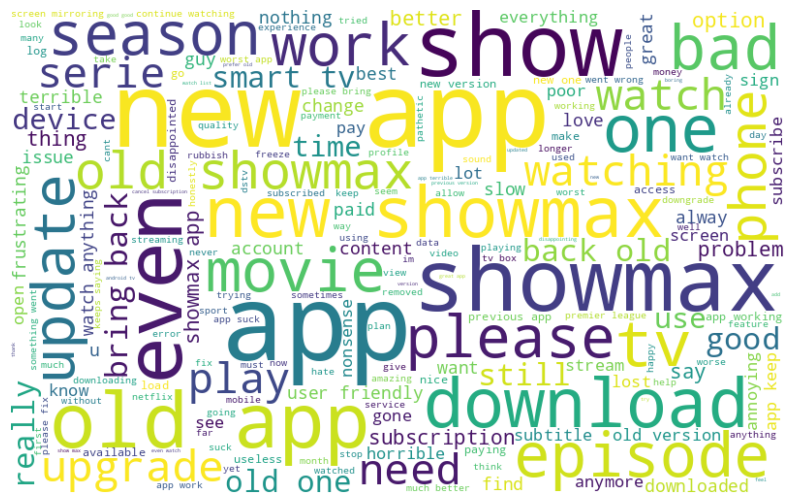

In [ ]:

# Create a word cloud from the cleaned reviews
all_words = ' '.join([text for text in showmax_df['cleaned_review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white', max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


**Word Cloud Output:**

Based on the results displayed by the word cloud, common words mentioned by Showmax users include:
1. Old
2. episode
3. download
4. showmax
5. update
6. subscription
7. season
8. bad
9. upgrade
10.please
11. play

Let's determine the freqently mentioned words using a frequency distribution chart.

In [ ]:
# Analyzing the frequency distribution of keywords

# Step 1: Tokenize the words
words = ' '.join(showmax_df['cleaned_review']).split()
word_freq = Counter(words)

# Step 2: Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Step 3: Plot the top 20 keywords
fig = px.bar(word_freq_df.head(20), x='word', y='frequency', title='Top 20 Keywords mentioned by Showmax App Users')
fig.show()


In [ ]:
word_freq_df.head(20)

,word,frequency
22,app,4829
87,new,2573
34,showmax,1818
33,old,1699
239,watch,1645
0,can't,1620
103,even,966
109,tv,929
269,one,867
2,shows,832


In [ ]:

# Save the DataFrame to a CSV file
word_freq_df.to_csv('word_freq_df.csv', index=False)

#### Word cloud Insights

The outcome of using Word cloud/NLTK  yielded the folowing results:

* "app" keyword was the most mentioned word, accounting for  **4829 times** it's mentioned by Showmax app users
* "new" keyword was second-most mentioned word, **2573 times**
* "showmax" keyword was the third-most mentioned word,**1818 times**
* "series" was the least mentioned word, being mentioned **489 times**

In general, keywords signaling app quality and user experience of the showmax app were frequently mentioned.

### Topic Modeling using LDA Algorithim

Topic modeling entails extracting major themes in textual data - reviews from our Timiza app users.

We will use Latent Dirichlet Allocation (LDA) algorithim.

Key steps:
* Load libraries
* Vectorize text data
* Apply LDA model to vectorized text data
* Illustrate top words for each topic

In [ ]:
#load libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(showmax_df['content'])


In [ ]:
#Instantiate and  Apply LDA model

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Illustrate top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

Top 10 words for topic #0
['like', 'old', 'series', 'showmax', 'just', 'watch', 'shows', 'watching', 'new', 'app']


Top 10 words for topic #1
['perfect', 'awesome', 'sign', 'amazing', 'movies', 'doesn', 'download', 'love', 'app', 'great']


Top 10 words for topic #2
['version', 'nice', 'just', 'user', 'bring', 'better', 'new', 'showmax', 'old', 'app']


Top 10 words for topic #3
['play', 'subscription', 'doesn', 'phone', 'keeps', 'new', 'showmax', 'watch', 'tv', 'app']


Top 10 words for topic #4
['takes', 'horrible', 'time', 'movies', 'quality', 'poor', 'slow', 'bad', 'app', 'good']




In [ ]:
# Visualize top words for each topic

def plot_top_words_for_topics(lda_model, vectorizer, n_top_words=10):
    """
    Plots the top words for each topic generated by the LDA model using Plotly.

    Parameters:
    lda_model (sklearn.decomposition.LatentDirichletAllocation): The trained LDA model.
    vectorizer (sklearn.feature_extraction.text.CountVectorizer or TfidfVectorizer): The vectorizer used to transform the text data.
    n_top_words (int): The number of top words to display for each topic. Default is 10.

    Returns:
    None: This function displays the plots directly.

    Example:
    plot_top_words_for_topics(lda_model, vectorizer, n_top_words=10)
    """
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
        top_words_scores = [topic[i] for i in top_words_indices]

        fig = go.Figure(data=[go.Bar(x=top_words, y=top_words_scores)])
        fig.update_layout(
            title=f"Top Words for Topic #{topic_idx}",
            xaxis_title="Words",
            yaxis_title="Scores",
            xaxis_tickangle=-45
        )
        fig.show()


plot_top_words_for_topics(lda, vectorizer)


In [ ]:
showmax_df[['content', 'score', 'distilbert_sentiment_label',
       'distilbert_sentiment_score']].sample(10)

,content,score,distilbert_sentiment_label,distilbert_sentiment_score
2659,Multichoice why did you not test your new Show...,1,NEGATIVE,0.999766
6761,Only plays sound and no video for premier League.,1,NEGATIVE,0.998272
2430,this is a downgrade. new seasons have disappea...,1,NEGATIVE,0.999637
3718,I can't download with this app and they can't ...,1,NEGATIVE,0.997898
5393,"vary slow, takes forever to login and not user...",1,NEGATIVE,0.999215
3049,You should just have left the old app to conti...,1,NEGATIVE,0.999775
3148,some of the seasons of popular series like adu...,1,NEGATIVE,0.999281
1702,"please bring back the old showmax, the new ver...",1,NEGATIVE,0.999814
3251,It's perfect and you can download when you hav...,4,POSITIVE,0.999573
5098,"Not user friendly, not loading, not playing we...",1,NEGATIVE,0.999628


#### Topic Modeling Insights

**Topic sampling method**: Segmentation of topics is based on relevancy and freshness of keywords - non-recurring group of keywords per topic.

**Topic 0**

* Top words include: [like', 'old', 'series', 'showmax', 'just', 'watch', 'shows', 'watching', 'new', 'app']

* In terms of volume of words relating to the top 3 sub-themes:

  a) ***app*** : 1,495 mentions

  b) ***new*** : 1,036 mentions

  c) ***watching***: 793 mentions

The three sub-themes represent what showmax users care about the most when interacting with the app based on app reviews: app's experience, new interface and streaming experience.

**Interpretation**:

* **Themes**: This topic focuses on showmax's **app user interface and user experience**, based on frequency of words such as 'watch', 'showmax', 'old','new', 'shows' and 'series'. Some users most likely prefer the old version of showmax app , and some like the new updated version of the app based on access to quality content.

**Insights**: Users who commented using keywords grouped in this topic are likely to continue using the app or churn based on user interface and user experience of the showmax app. Customer-centric UI/UX and quality of showmax's content library is important for showmax users.

**Topic 3**

* Top words include: ['play', 'subscription', 'doesn', 'phone', 'keeps', 'new', 'showmax', 'watch', 'tv', 'app']

* In terms of volume of words relating to the top 3 sub-themes:

  a) ***app*** : 1,480 mentions

  b) ***tv*** : 1,277 mentions

  c) ***watch***: 977 mentions

The three sub-themes represent what showmax users care about the most when interacting with the app based on app reviews: app (functionality), tv (integration with television and tv streaming experience) and streaming experience.

**Interpretation**:

* **Themes**: This topic focuses on showmax's **app performance and integration capabilities**  in terms of users paying for subscriptions, integrating showmaxapp with televion set for a family or group watching experience and quality of mobile app  based on frequency of words such as 'subscription', 'tv', 'play' 'new', and 'watch'.

* **Insights**: Users who commented using keywords grouped in this topic are likely expressing disatisfaction with their current showmax app, app updates that make using the app difficult, and poor copatibity with television sets.


**Other General Themes and Insights**

1. slow: About 239 users had a challenge with the app's response time
2. great: About 398 users had great experience using the showmax app
3. download: About 104 mentioned download in relation to showmax app, sugesting having trouble downloading the app

## User Segment Analysis

User segment analysis focuses on understanding different patterns and trends users of a mobile app depict within the reviews they share.

It involves categorizing users into distinct groups (segments) based on specific characteristics, behaviors, or preferences.

This can help a business understand how different types of users interact with its product, service, or mobile app, and tailor marketing strategies and product development to satisfy their core needs.

**Implementation steps:**

* Segment users based on sentiment and rating (review score)
* Segment users based on dominant topic insigts


### Segmenting Users based on Sentiment and Review Score

Classification of Showmax App users will be based on type of sentiment. Users who shared reviews will be categorized as:

* Positive sentiment and score is greater than 4: **Happy**  Showmax Users
* Negative sentiment and score is below 2: **Sad** Showmax Users

In [ ]:
#Function for segmenting users based on sentiment label and review score
def classify_user(row):
    """
    Classify users based on sentiment and score.

    Args:
        row (pd.Series): A DataFrame row containing 'score' and 'distilbert_sentiment_label'.

    Returns:
        str: User segment ('Happy Showmax User', 'Sad Showmax User', 'Nutral Showmax User').
    """
    if row['score'] >= 4 and row['distilbert_sentiment_label'] == 'POSITIVE':
        return 'Happy Showmax Users'
    elif row['score'] <= 3 and row['distilbert_sentiment_label'] == 'NEGATIVE':
        return 'Sad Showmax Users'
    else:
        return 'Neutral Showmax Users'


# Apply the  segmentation function to the dataset
showmax_df['user_type'] = showmax_df.apply(classify_user, axis=1)

# Show the user segmentation
print(showmax_df[['content', 'score', 'distilbert_sentiment_label', 'user_type']].head())


                                             content  score  \
0  You can't remove shows from continue watching....      2   
1  It does have nice Afrikaans shows but was watc...      2   
2  There's some things about the interface that c...      3   
3  Showmax has fantastic shows, but this new app ...      1   
4  Whilst Showmax did promise to eventually trans...      2   

  distilbert_sentiment_label          user_type  
0                   NEGATIVE  Sad Showmax Users  
1                   NEGATIVE  Sad Showmax Users  
2                   NEGATIVE  Sad Showmax Users  
3                   NEGATIVE  Sad Showmax Users  
4                   NEGATIVE  Sad Showmax Users  


In [ ]:
# Sentiment distribution by user type

# Group by user type and count the number of reviews for each sentiment label
sentiment_distribution_by_user_type = showmax_df.groupby(['user_type', 'distilbert_sentiment_label'])['content'].count().unstack()

# Display the results
print(sentiment_distribution_by_user_type)



distilbert_sentiment_label  NEGATIVE  POSITIVE
user_type                                     
Happy Showmax Users              NaN    2399.0
Neutral Showmax Users          454.0     567.0
Sad Showmax Users             8589.0       NaN


In [ ]:
# proportion of sentiment distribution by user type
sentiment_distribution_by_user_type_prop = sentiment_distribution_by_user_type.div(sentiment_distribution_by_user_type.sum(axis=1), axis=0)

print(sentiment_distribution_by_user_type_prop)

distilbert_sentiment_label  NEGATIVE  POSITIVE
user_type                                     
Happy Showmax Users              NaN  1.000000
Neutral Showmax Users       0.444662  0.555338
Sad Showmax Users           1.000000       NaN


In [ ]:
showmax_df['user_type'].value_counts().sort_index()

,count
user_type,
Happy Showmax Users,2399
Neutral Showmax Users,1021
Sad Showmax Users,8589


In [ ]:
# Visualize the distribution using Plotly
fig = px.bar(sentiment_distribution_by_user_type, barmode='group', title='Sentiment Distribution by User Type')
fig.show()


#### Sentiment Distribution by User Type Insights


**Output of Segmenting User Types by Sentiment**:

1. There are about **2,399** Happy Showmax users
2. There are about **8,589** Sad Showmax users
3. There are about  **1,021** Neutral Showmax Users - Neither happy or sad, expressing both positive and negative sentiment.

In [ ]:
# Score distribution per user type

# Group by user type and calculate the distribution of scores
score_distribution_by_user_type = showmax_df.groupby(['user_type', 'score'])['content'].count().unstack()

# Display the results
print(score_distribution_by_user_type)

# Visualize the distribution using Plotly
fig = px.bar(score_distribution_by_user_type, barmode='group', title='Review Score Distribution by User Type')
fig.show()


score                       1      2      3      4       5
user_type                                                 
Happy Showmax Users       NaN    NaN    NaN  338.0  2061.0
Neutral Showmax Users   319.0   86.0  162.0  125.0   329.0
Sad Showmax Users      7452.0  731.0  406.0    NaN     NaN


#### Segmenting User Types by Review Scores Insights


**Output of Segmenting User Types by Review Score**:

Happy Showmax Users segmentation:

1. 4-Star Happy Showmax app users: 338 users
2. 5-Star HappyShowmax app users: 2,061 users

Sad Showmax Users segmentation:

1. 1-Star Sad Showmax app users: 7,452 users
2. 2-star Sad Showmax app users: 731 users
3. 3-star Sad Showmax app users: 406 users

### Segmenting Users based on Topic Modeling Insights - Dominant Topics

Classification of Showmax app users based on defined categories of dominant keywords that influence the behaviour and opinions of showmax users.

Approach:
* Assign dominant topics to each review
* Group users based on their reviews' dominat topics



In [ ]:
# Based on top 10 words per topic, create a column that assigns each review to a dominant topic,
# the top 10 words are based on output of LDA model

# Define dictionary of top words for each topic based on LDA model
topic_top_words = {
    0: ["like", "old", "series", "showmax", "just", "watch", "shows", "watching", "new", "app"],
    1: ["perfect", "awesome", "sign", "amazing", "movies", "doesn", "download", "love", "app", "great"],
    2: ["version", "nice", "just", "user", "bring", "better", "new", "showmax", "old", "app"],
    3: ["play", "subscription", "doesn", "phone", "keeps", "new", "showmax", "watch", "tv", "app"],
    4: ["takes", "horrible", "time", "movies", "quality", "poor", "slow", "bad", "app", "good"]
}

# Mapping of topic indices to descriptive topic names
topic_name_mapping = {
    0: "Streaming Experience & Content Variety",
    1: "User Experience",
    2: "App Version & Usability",
    3: "Device Compatibility Issues",
    4: "App Performance & Quality Issues"
}

def assign_dominant_topic(review):
    """
    Assigns the dominant topic to a review based on keyword matching.

    This function calculates the topic for a given review by identifying
    the topic with the most shared keywords. Each topic has an associated
    list of top words, and the review is assigned the topic with the highest
    overlap of words.

    Parameters:
    review (str): The review text to assign a dominant topic.

    Returns:
    str: The name of the dominant topic assigned to the review.
    """
    # Convert review to lowercase and split into unique words
    review_words = set(review.lower().split())

    # Initialize a dictionary to store the score for each topic

    # Determine the topic with the maximum score
    dominant_topic_index = max({topic_index: len(review_words.intersection(top_words))
                    for topic_index, top_words in topic_top_words.items()}, key={topic_index: len(review_words.intersection(top_words))
                    for topic_index, top_words in topic_top_words.items()}.get)

    # Return the name of the dominant topic
    return topic_name_mapping.get(dominant_topic_index, "Unknown Topic")

# Apply the function to each review to create a new 'dominant_topic' column
showmax_df["dominant_topic"] = showmax_df["content"].apply(assign_dominant_topic)




In [ ]:
# Print some samples to verify
print(showmax_df[["content", "dominant_topic"]].sample(20))

                                                 content  \
10770                                               good   
7087   I really hate it,it's nt a good app seriously ...   
552    It's great, if you the kinda person that likes...   
8718             work on the subtitles for the SA shows.   
6853                             Very slow with glitches   
6158   I just got the app today, and it's giving me p...   
7233   I can't understand why I can't find my previou...   
10064                                             nice 👍   
2158   Well I can't wait for my subscription to expir...   
499    My downloads have a glitch or just won't play....   
8557   It's been blank for a week now @Showmax ....pl...   
6073   I couldn't even subscribe, it has only one pay...   
850    The old app was fine, if you guys wanted to ma...   
8897                     These new showmax app is sucks.   
11781                                               Poor   
8788                         I have no s

In [ ]:
# Group users per dominant topic by counting occurences of each dominat topic

user_topic_counts = showmax_df.groupby(['content', 'dominant_topic']).size().unstack(fill_value=0)

# Determine the most common topic for each user
user_primary_topic = user_topic_counts.idxmax(axis=1)

# user segments dataframe
user_segments = user_primary_topic.reset_index(name='dominant_topic')

# Print the user segments
print(user_segments.head(10))

                                             content  \
0  "Fixed" the true south african way... unsubscr...   
1  "Mirroring is not allowed on showmax" when wat...   
2  "Screen mirroring is not allowed on Showmax." ...   
3  "Showmax has a new TV app. Unfortunately your ...   
4  "Something went wrong" is the summary of the e...   
5                  "Something went wrong" 🤦🏾‍♀️🤦🏾‍♀️   
6  "screen mirroring error" when I'm watching on ...   
7  "something has gone wrong" message continuousl...   
8  #nonsense.... thats what happens when you fix ...   
9              ,it rejects my smart TV supersonic, y   

                           dominant_topic  
0  Streaming Experience & Content Variety  
1  Streaming Experience & Content Variety  
2  Streaming Experience & Content Variety  
3             Device Compatibility Issues  
4  Streaming Experience & Content Variety  
5  Streaming Experience & Content Variety  
6  Streaming Experience & Content Variety  
7        App Performance & Qual

In [ ]:
# numerical proportion of dominant topic
user_segments['dominant_topic'].value_counts(normalize=True).sort_index()

,proportion
dominant_topic,
App Performance & Quality Issues,0.070878
App Version & Usability,0.087200
Device Compatibility Issues,0.120026
Streaming Experience & Content Variety,0.655969
User Experience,0.065927


In [ ]:
# Visualize user segments based on dominant topics using plotly

import plotly.express as px

# Numerical counts of user segments
user_segment_counts = showmax_df['dominant_topic'].value_counts().sort_values(ascending=False)

fig = px.bar(
    user_segment_counts,
    x=user_segment_counts.index,
    y=user_segment_counts.values,
    labels={'x': 'User Segment', 'y': 'Number of Users'},
    title='Distribution of Showmax User Segments Based on Dominant Topics'
)
fig.show()

#### User Segmentation by Dominant Topics Insights

Key insights derived from segmenting Showmax users based on dominant topics include:

1. Showmax users segmented by  **Streaming Experience & Content Variety** topic: 7,528 users
2. Showmax users segmented by **Device Compatibility Issues** topic: 1,316 users
3. Showmax users segmented by **App Peformance & Quality Issues** topic: 1,174 users
4. Showmax users segmented by **App Version & Usability** topic: 1,034 users
5. Showmax users segmented by **User Experience** topic: 957 users

**Best practice**: Save final version of the dataset as csv file

In [ ]:
# save showmax_df as csv file named: "showmax_data_2024"

showmax_df.to_csv('showmax_data_2024.csv', index=False)

## Summarized Insights



The overarching insights obtained from the NLP project entails:


1. 1-Score reviews dwarfed others by leading with 7,771 1-Score reviews submitted by Showmax users

2. Showmax **App version 4.12.21** had the highest number of reviews submited by Showmax App users, about **3,633** reviews. In contrast, **App verison 5.9.32** had the lowest number of reviews submitted by Showmax users, about 7 reviews.


3. Based on review scores metric, the best-performing version of the Showmax app was App version 5.9.33. **App version 5.9.33** received the highest average review score of 3.5. The number of reviews submitted by users for App version 5.9.33 was 182. **App version 1.10.74** received the lowest average review score of 1.2.

4. The low average score App version 1.0.0 contrasts the number of reviews it received, 1474 reviews.

5. In general, the **average sentiment score is 0.98.** This means the majority of reviews expressed by Showmax App users are positive.

6. In terms of segmenting number of reviews per sentiment score, **about 11,120 reviews**, the leading number of reviews, had a sentiment score ranging between **0.975 and 1.02**. In contrast, only 39 reviews had a relatively low positive score ranging between 0.62 and 0.67

7. In terms of topic modeling and frequency of words analysis:

  **Topic 0**

  * Top words include: ['like', 'old', 'series', 'showmax', 'just', 'watch', 'shows', 'watching', 'new', 'app']

  * In terms of volume of words relating to the top 3 sub-themes:

    a) ***app*** : 1,296 mentions

    b) ***new*** : 1,036 mentions

    c) ***watching***: 793 mentions

  The three sub-themes represent what showmax users care about the most when interacting with the app based on app reviews: app's experience, new interface and streaming experience.

  **Interpretation**:

* **Themes**: This topic focuses on showmax's **app user interface and user experience**, based on frequency of words such as 'watch', 'showmax', 'old','new', 'shows' and 'series'. Some users most likely prefer the old version of showmax app , and some like the new updated version of the app based on access to quality content.

* **Insights**: Users who commented using keywords grouped in this topic are likely to continue using the app or churn based on user interface and user experience of the showmax app. Customer-centric UI/UX and quality of showmax's content library is important for showmax users.

  **Topic 3**

  * Top words include: ['play', 'subscription', 'doesn', 'phone', 'keeps', 'new', 'showmax', 'watch', 'tv', 'app']

  * In terms of volume of words relating to the top 3 sub-themes:

    a) ***app*** : 1,480 mentions

    b) ***tv*** : 1,277 mentions

    c) ***watch***: 977 mentions

The three sub-themes represent what showmax users care about the most when interacting with the app based on app reviews: app (functionality), tv (integration with television and tv streaming experience) and streaming experience.

**Interpretation**:

* **Themes**: This topic focuses on showmax's **app performance and integration capabilities**  in terms of users paying for subscriptions, integrating showmaxapp with televion set for a family or group watching experience and quality of mobile app  based on frequency of words such as 'subscription', 'tv', 'play' 'new', and 'watch'.

* **Insights**: Users who commented using keywords grouped in this topic are likely expressing disatisfaction with their current showmax app, app updates that make using the app difficult, and poor copatibity with television sets.


**Other General Themes and Insights**

* slow: About 239 users had a challenge with the app's response time
* great: About 398 users had great experience using the showmax app
* download: About 104 mentioned download in relation to showmax app, sugesting having trouble downloading the app


8. In terms of **segmenting user types by Sentiment**:

* There are about **2,399** Happy Showmax users
* There are about **8,589** Sad Showmax users
* There are about  **1,021** Neutral Showmax Users - Neither happy or sad, expressing both positive and negative sentiment.

9. In terms of **segmenting user types by Review Scores**:

Happy Showmax Users segmentation:

* 4-Star Happy Showmax app users: 338 users
* 5-Star HappyShowmax app users: 2,061 users

Sad Showmax Users segmentation:

* 1-Star Sad Showmax app users: 7,452 users
* 2-Star Sad Showmax app users: 731 users
* 3-Star Sad Showmax app users: 406 users

10. In terms of **segmenting Shoxmax app users by dominant features/topic**:
* Showmax users segmented by  **Streaming Experience & Content Variety** topic: 7,528 users
* Showmax users segmented by **Device Compatibility Issues** topic: 1,316 users
* Showmax users segmented by **App Peformance & Quality Issues** topic: 1,174 users
* Showmax users segmented by **App Version & Usability** topic: 1,034 users
* Showmax users segmented by **User Experience** topic: 957 users

## Recommendations

The key recommendations Showmax can adopt based on the data-influenced insights include:


1. **Focus on Performance and Stability with Every App Update**

* **Data Insight:** Showmax version 4.12.21 had the highest number of reviews (3,633), while version 5.9.32 had only 7. Version 5.9.33 received the highest average score of 3.5, with 182 reviews. In contrast, version 4.12.21 had an average score of 1.9. The volume of negative reviews around performance and functionality issues in the early version indicates that stability and performance improvements are key.

* **Recommendation:** Focus on replicating the elements that made version 5.9.33 more successful, potentially applying these to future versions to increase positive feedback. Conduct more rigorous testing before rolling out updates, especially to avoid disrupting features users find essential.

* **Actionable Suggestion:** Analyze the development changes made in version 5.9.33 versus other versions, prioritize similar updates, and incorporate enhancements into future releases. For upcoming updates, release beta versions for a small group of users to test performance and stability before rolling out the update to all users.


2. **Improving User Interface (UI) and User Experience (UX)**

* **Data Insight:** Topic 0 highlighted the importance of the app’s experience, new interface, and streaming experience, with 1,036 mentions of “new” and 793 mentions of “watching.” Users expressed mixed feelings, with some preferring the old version of the app.

* **Recommendation:** Create a more customer-centric UI/UX by balancing the needs of users who prefer the old interface with those who appreciate the new interface to appeal to a broader user base.

* **Actionable Suggestion:** Roll out a survey or a feedback prompt within the app to gather specific feedback on desired UI/UX elements. Implement a “classic mode” alongside the updated interface, allowing users to switch between views based on preference.

3. **Invest in Improving Content Access and Streaming Experience**

* **Data Insight:** A large group of users (7,528) focuses on the streaming experience and content variety, indicating that this is a core value for Showmax subscribers. Content themes had high engagement (e.g., “app” had 1,296 mentions and “watch” had 1,700+ mentions). The quality of Showmax's content library is important for Showmax customers.

* **Recommendation:** Prioritize content variety and accessibility updates, ensuring high-quality streaming for both new and existing content.

* **Actionable Suggestion:** Regularly update and promote new shows based on popularity and audience engagement, consider adding filters for easy content discovery, and optimize personalized recommendations based on watching history.

4. **Optimize Device Compatibility and App Performance Issues**

* **Data Insight:** 1,316 users mentioned device compatibility, and 1,174 mentioned app performance issues as prominent concerns.

* **Recommendation:** Address app integration issues, particularly for TV and other devices, to provide a more consistent streaming experience.

* **Actionable Suggestion:** Perform compatibility testing on a wide range of devices, including popular smart TVs, and release specific updates for improved performance on these platforms. Consider adding a **“Help & Support”** guide specifically for TV connectivity and streaming setup within the app to help users troubleshoot.

5. **Provide Transparency and Clear Communication Around App Updates**

* **Data Insight:** Reviews indicated that many users were dissatisfied with app updates, particularly when they impacted user experience or functionality. Version 4.12.21 received a high number of reviews, but the feedback indicated dissatisfaction with the updates.

* **Recommendation:** Be transparent with users about what to expect from updates, explaining changes and improvements in detail to avoid confusion or frustration.

* **Actionable Suggestion:** Before releasing major updates, provide users with detailed release notes or a short video highlighting the changes and improvements, addressing common pain points (e.g., improved login, and enhanced performance).

6. **Leverage Happy Users for Brand Advocacy**

* **Data Insight:** There are around 2,399 Happy Showmax users, of which 2,061 gave 5-star ratings. These users are likely to advocate for Showmax if engaged appropriately.

* **Recommendation:** Engage satisfied users by encouraging them to share positive experiences on social media and tag Showmax, which may offset negative reviews.

* **Actionable Suggestion:** Create a referral program or incentives for users to leave reviews and share their Showmax experience on social media, amplifying positive sentiments. Rewards can be discounts on monthly subscriptions or free subscription periods.







